# Reproducible Reproduce on Customer Churn Data ~ From R to Python

We will be reproducing this project from R to Python wherein we will be doing Data analysis and create a model to predict the customer churn. Link to R project https://www.kaggle.com/code/rankirsh/do-you-feel-the-churn-visualisation-prediction . 

The project will be sub-divided into steps:
- Introduction and description of data
- Identifying relationships Univariate & Bivariate analysis
- Automating EDA
- Model Building & evaluation
- Results & interpretation
-Conclusion


We will further improve this study by :
- Since our dataset has many predicting variables *(21)*, therefore we will identify the predictive power of the variables and selecting variables with a high predictive power to be used in our model. To achieve this we will use **Univariate Analysis technique** which analyzes the relationship between each individual variable and the target variable to assess the significance of the relationship.
- We will Balance the dataset for improved model performance


# Predicting Telecom Churn using Machine Learning

## Problem Statement

The rapid growth of the telecommunications industry has led to intense competition among service providers. One of the key challenges faced by these providers is customer churn, which refers to the rate at which customers switch to rival companies or discontinue using their services altogether. Churn has a significant impact on a telecom company's revenue, profitability, and market share.

The objective of this project is to develop a machine learning model that can accurately predict customer churn in the telecom industry. By identifying customers who are most likely to churn, the company can take proactive measures to retain them, such as offering personalized incentives or improving service quality. This will help reduce customer attrition, increase customer loyalty, and ultimately improve the company's financial performance.

The project will involve the following steps:

- **Data Collection**: Gather a comprehensive dataset containing relevant information about customers, their usage patterns, billing details, and historical churn data. The dataset should be diverse and representative of the company's customer base.

- **Data Preprocessing**: Perform necessary data cleaning, transformation, and feature engineering techniques to ensure the dataset is suitable for training a machine learning model. This step may involve handling missing values, removing outliers, and encoding categorical variables.

- **Exploratory Data Analysis**: Conduct a thorough exploratory data analysis to gain insights into the dataset, identify patterns, and understand the factors that contribute to churn. This analysis will help in selecting the most relevant features for the prediction model.

- **Model Selection**: Evaluate and compare different machine learning algorithms to identify the most suitable model for churn prediction. The chosen model should be able to handle the dataset's size, complexity, and class imbalance effectively.

- **Model Training and Evaluation**: Split the dataset into training and testing sets and train the selected model on the training data. Evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Fine-tune the model if necessary.

- **Prediction and Deployment**: Use the trained model to make predictions on new, unseen data and assess its performance. Once satisfied with the model's accuracy and reliability, deploy it into a production environment where it can be utilized to predict customer churn in real-time.

The successful development of this machine learning model will enable the telecom company to proactively identify customers at risk of churn and implement effective retention strategies. This will ultimately lead to improved customer satisfaction, increased revenue, and a stronger market position in the highly competitive telecom industry.


# Data Dictionary

- **customerID**: Unique identifier for each customer.
- **gender**: Gender of the customer (Male or Female).
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1: Yes, 0: No).
- **Partner**: Whether the customer has a partner or not (Yes or No).
- **Dependents**: Whether the customer has dependents or not (Yes or No).
- **tenure**: Number of months the customer has been with the company.
- **PhoneService**: Whether the customer has a phone service or not (Yes or No).
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, or No phone service).
- **InternetService**: Customer's internet service provider (DSL, Fiber optic, or No).
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, or No internet service).
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, or No internet service).
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, or No internet service).
- **TechSupport**: Whether the customer has tech support or not (Yes, No, or No internet service).
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, or No internet service).
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, or No internet service).
- **Contract**: The contract term of the customer (Month-to-month, One year, or Two year).
- **PaperlessBilling**: Whether the customer has opted for paperless billing or not (Yes or No).
- **PaymentMethod**: The customer's preferred payment method.
- **MonthlyCharges**: The amount charged to the customer on a monthly basis.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Whether the customer has churned or not (Yes or No).


### Upload Required Libraries

In [9]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'white')
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image  
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data 

In [10]:
# import the dataset
data = pd.read_csv("C:\\Users\\sjoshi6\\OneDrive - Biogen\\Desktop\\UNI\\RR\\Churn_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sjoshi6\\OneDrive - Biogen\\Desktop\\UNI\\RR\\Churn_data.csv'

In [ ]:
# check first 5 columns of the dataset
data.head()

# Introduction


This part of the project, we will load our Churn dataset, and perform data cleaning including handle missing values and remove duplicates. This will prepare our dataset for further exploration and analysis.

In [40]:
# check the information of the whole dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The info() method gives basic information about our dataset i.e number of columns (21) and rows (7 043) as well as the datatypes (int64 & float64).

In [41]:
# statistical summary of numeric variables
data.describe(include ='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5876-QMYLD,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [42]:
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [43]:
#check missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Automating EDA

In [62]:
from pandas_profiling import ProfileReport
import sweetviz as sv

<ipython-input-62-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Generate a comprehensive profile report for the dataset using pandas-profiling.
# The report will provide descriptive statistics, data types, missing values, correlations, and more.
report = ProfileReport(data)

In [ ]:
# Save the generated profile report as an HTML file.
# This will allow easy sharing and viewing of the report.
report.to_file('report.html')

In [ ]:
# Perform automated exploratory data analysis using the SweetViz library.
# The analyze() function generates a comprehensive report with visualizations and statistical summaries.
report1 = sv.analyze(data)

In [ ]:
# Perform automated exploratory data analysis using the SweetViz library.
# The analyze() function generates a comprehensive report with visualizations and statistical summaries.
# In this case, we are analyzing the "Churn Dataset" and specifying "Churn" as the target feature for further analysis.
report = sv.analyze([data, "Churn Dataset"], target_feat="Churn")

In [ ]:
report.show_html('report2.html')

# Importing the required libraries
import pandas as pd
import pandas_profiling
import sweetviz as sv

# Load the dataset
df = pd.read_csv('your_dataset.csv')

# Pandas Profiling
# ------------------------------------------------------------
## Pandas Profiling

# Generate a comprehensive report:
pandas_profiling_report = """
### Comprehensive Report:
- Generates a detailed report summarizing the dataset.
- Includes descriptive statistics, data types, value counts, and more.
- Provides insights into the structure and characteristics of the data.
"""

# Perform automatic analysis:
pandas_profiling_analysis = """
### Automatic Analysis:
- Performs various analyses automatically without the need for manual coding.
- Analyzes distributions, missing values, correlations, and other important aspects.
- Saves time and effort in the initial data exploration process.
"""

# Generate an interactive HTML output:
pandas_profiling_html = """
### Interactive HTML Output:
- Generates an interactive HTML file as the output.
- Allows for easy sharing, viewing, and navigation in a web browser.
- Enables interactive exploration of the analysis results.
"""

# Customize the analysis:
pandas_profiling_customization = """
### Customizable:
- Provides some level of customization options.
- Allows specifying thresholds for correlation analysis and adjusting histogram bins.
- Supports excluding specific variables from the analysis if desired.
"""

# Handle large datasets efficiently:
pandas_profiling_large_datasets = """
### Handling Large Datasets:
- Efficiently handles large datasets.
- Provides analysis and insights within a reasonable time frame.
- Suitable for datasets of varying sizes.
"""

# Generate the Pandas Profiling report
profile = pandas_profiling.ProfileReport(df)

# Save the Pandas Profiling report to an HTML file
profile.to_file("pandas_profiling_report.html")

# Sweetviz
# ------------------------------------------------------------
## Sweetviz

# Generate high-quality visualizations:
sweetviz_visualizations = """
### High-Quality Visualizations:
- Emphasizes generating visually appealing and informative visualizations.
- Offers various types of visualizations, including histograms, bar charts, scatter plots, and box plots.
- Enhances data exploration and understanding through visual representations.
"""

# Enable side-by-side comparisons:
sweetviz_comparisons = """
### Side-by-Side Comparisons:
- Enables easy comparison of multiple datasets or subgroups within a dataset.
- Facilitates the identification of differences and similarities across different data subsets.
- Useful for understanding variations and patterns in the data.
"""

# Analyze the target variable:
sweetviz_target_variable = """
### Target Variable Analysis:
- Provides in-depth analysis and comparison of the target variable.
- Helps in assessing the relationship between the target variable and other features.
- Particularly useful for predictive modeling tasks.
"""

# Customize the report templates:
sweetviz_customization = """
### Customizable Templates:
- Offers customizable report templates to adjust the level of detail.
- Allows users to choose the specific analyses and visualizations to include in the report.
- Tailors the output to specific requirements and preferences.
"""

# Generate standalone HTML reports:
sweetviz_standalone_html = """
### Standalone HTML Reports:
- Generates a standalone HTML file as the output report.
- Can be easily shared and viewed without additional dependencies.
- Provides a self-contained report for further exploration and sharing.
"""

# Analyze the dataset and generate the Sweetviz report
report = sv.analyze(df)

# Save the Sweetviz report to an HTML file
report.show_html("sweetviz_report.html")


### General EDA 

In [44]:
#data['TotalCharges'].isnull()
data[data['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 clients with tenure = 0. All the clients with missing values have a tenure of 0 which means that they are fresh clients who have yet to pay a bill so the value of TotalCharges should be 0 for them.

## Describe the data using Seaborn  and Matplotlib plots

## 1. Categorical Variables

In [45]:
# Identify Categorical variables

cat_vars = []
for column in data.columns:
    if data.dtypes[column] == 'object':  # Check if the data type is 'object'
        cat_vars.append(column)
        
print(cat_vars)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


We remove first column customerID and Total Charges which is a numeric variable.

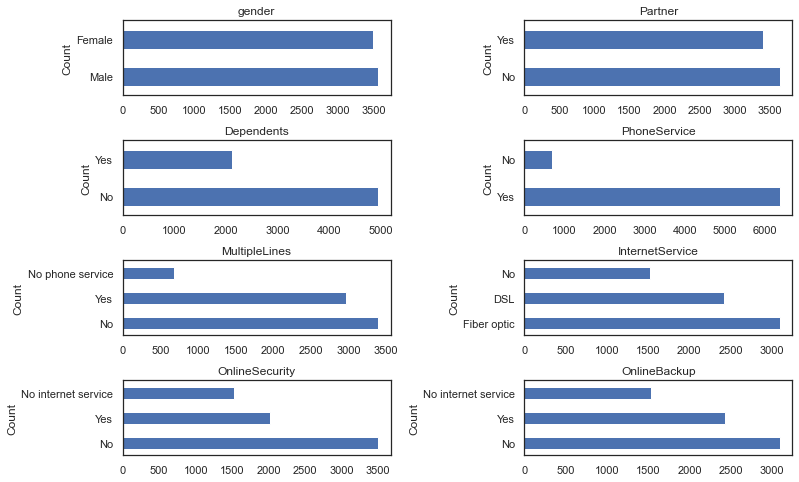

In [46]:
# Plots for categorical Variables

# Exclude the first variable and TotalCharges variables
cat_vars = [var for var in cat_vars if var not in ['customerID', 'TotalCharges']]  

cat_vars1 = cat_vars

n_rows = 4  # Number of subplot rows
n_cols = 2  # Number of subplot columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over the categorical variables and create the plots
for i, var in enumerate(cat_vars1[0:8]):
    ax = axes[i]  # Select the current subplot
    data[var].value_counts().plot(kind='barh', ax=ax)  # Plot the value counts as a bar chart
    ax.set_title(var)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove x-axis label to avoid clutter
    ax.set_ylabel('Count')  # Set y-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5) 

# Show the plots
plt.show()

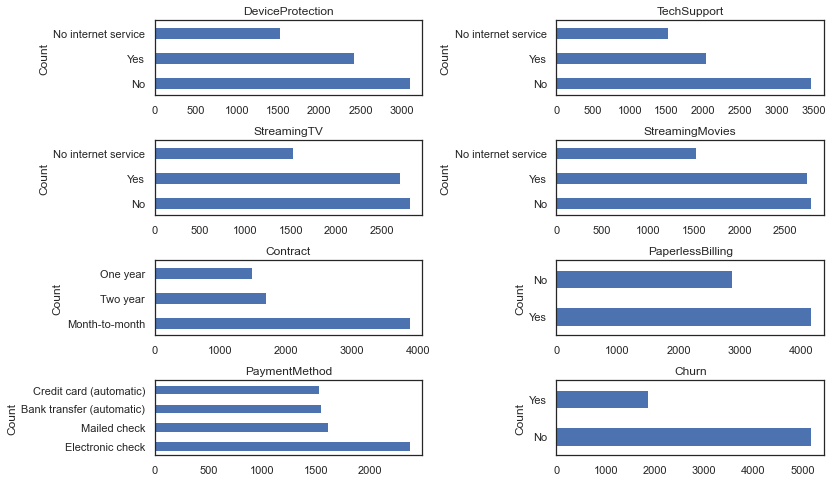

In [47]:
# Plots for categorical Variables
cat_vars2 = cat_vars  # Exclude the first variable and last 2 variables

n_rows = 4  # Number of subplot rows
n_cols = 2  # Number of subplot columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over the categorical variables and create the plots
for i, var in enumerate(cat_vars2[8:16]):
    ax = axes[i]  # Select the current subplot
    data[var].value_counts().plot(kind='barh', ax=ax)  # Plot the value counts as a bar chart
    ax.set_title(var)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove x-axis label to avoid clutter
    ax.set_ylabel('Count')  # Set y-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5) 

# Show the plots
plt.show()

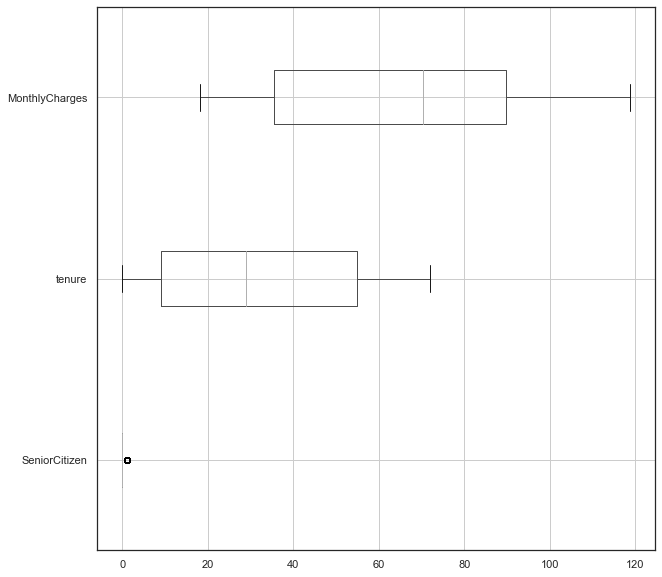

In [48]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

From the above box plow we can verify that we dont have any outliers

### Interpertation of  Categorical Variables

- Gender and Partner are evenly distributed
- Most variables are almost evenly distributed with the exception of **Phone Service** where majority of clients have a Phone service
- Variable classification **"No Phone Service"** will be regarded as **No**

## 2. Numeric Variables

In [49]:
# Identify Numeric variables

num_vars = []
for column in data.columns:
    if data.dtypes[column] != 'object':  # Check if the data type is 'object'
        num_vars.append(column)
        
# Add variable total charges
num_vars += ['TotalCharges']
num_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [50]:

# Assuming your DataFrame is called 'df' and the churn column is named 'Churn'
churn_counts = data['Churn'].value_counts()
print(churn_counts)


No     5174
Yes    1869
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Histogram Plot ~ Monthly Charges')

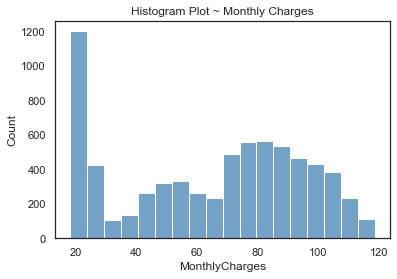

In [51]:
# plots for numeric variables
sns.histplot(data=data, x='MonthlyCharges', color='steelblue').set_title('Histogram Plot ~ Monthly Charges')

In [52]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [53]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


Text(0.5, 1.0, 'KdePlot ~ Total Charges')

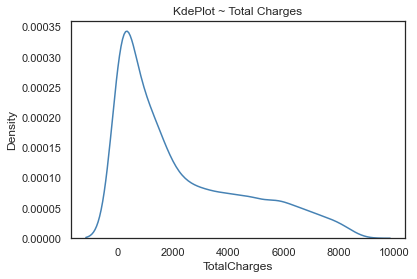

In [54]:
# total Charges
# remove non numeric values in Total Charges variable
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#numeric_data = data[data['TotalCharges'].notnull()]

sns.kdeplot(data['TotalCharges'], color='steelblue').set_title('KdePlot ~ Total Charges')


Text(0.5, 1.0, 'Histogram Plot ~ tenure')

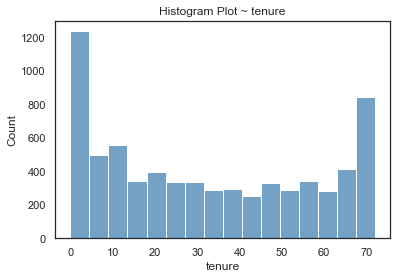

In [55]:
# tenure
sns.histplot(data=data, x='tenure', color='steelblue').set_title('Histogram Plot ~ tenure')

Text(0.5, 1.0, 'Count Plot ~ SeniorCitizen')

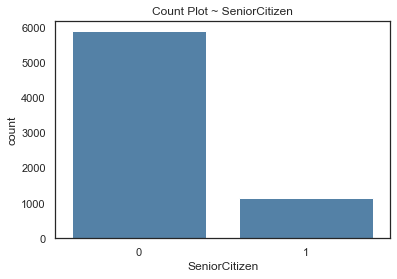

In [56]:
# tenure
sns.countplot(data=data, x='SeniorCitizen', color='steelblue').set_title('Count Plot ~ SeniorCitizen')

### Interpertation of  Numeric Variables

- using the kde plot, the distribution of **Total Charges** is skewed to right
- The distribution of citizens is imbalanced.

# Step 2 - Identifying relationships

Lets first check Churn vs Tenure

In [57]:
data.drop("customerID",axis=1,inplace = True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


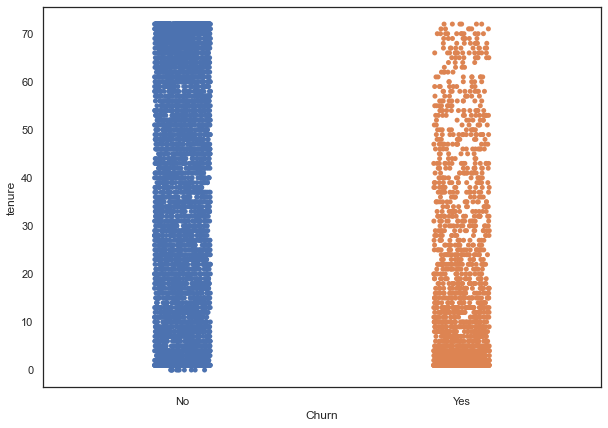

In [59]:


plt.figure(figsize=(10, 7))
sns.stripplot(x=data['Churn'], y=data['tenure'], jitter=True)
plt.show()


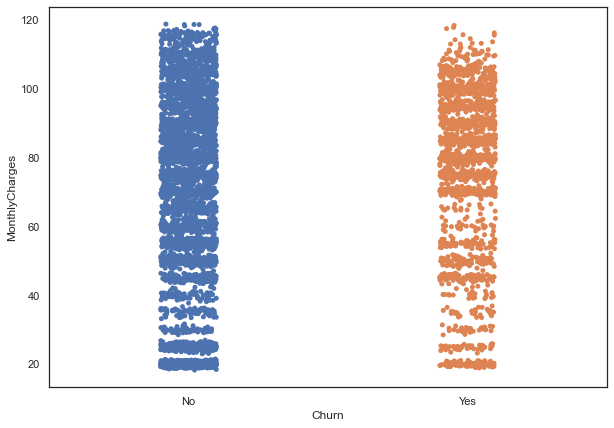

In [60]:


plt.figure(figsize=(10, 7))
sns.stripplot(x=data["Churn"], y=data["MonthlyCharges"], jitter=True)
plt.show()


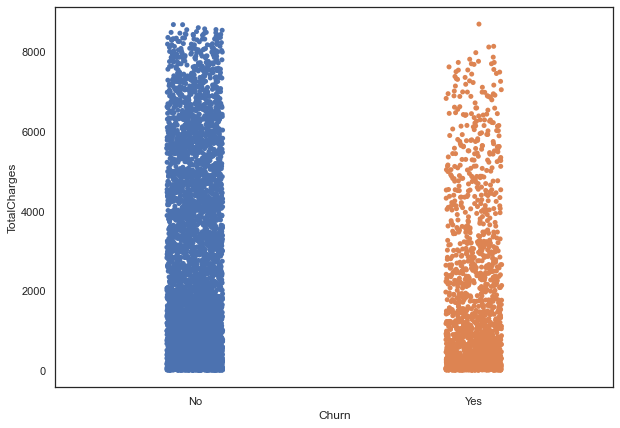

In [61]:

plt.figure(figsize=(10, 7))
sns.stripplot(x=data["Churn"], y=data["TotalCharges"], jitter=True)
plt.show()


In [26]:
#for cat in data.select_dtypes(include='object'):
    #data[cat] = data[cat].astype('category')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [29]:
data.dropna(inplace = True)

In [30]:
catVariables = ["gender", "SeniorCitizen", "Partner", "Dependents","PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]


## Chi-square:

Chi-square is a statistical test that can be used to determine if there is a significant relationship between two categorical variables. It involves comparing the observed frequencies of each category in a contingency table to the expected frequencies, assuming that there is no relationship between the variables.

In [31]:
def chi_square_test(data, alpha=0.05):
    """
    Perform a chi-square test of independence on a contingency table and return the test result and interpretation.

    Parameters:
    data (list of lists): A contingency table of observed frequencies
    alpha (float): The significance level (default: 0.05)

    Returns:
    result (str): The test result and interpretation
    """

    # perform chi-square test
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    if p <= alpha:
        result = f"Dependent (reject H0) with p-value {p:.6f}"
    else:
        result = f"Independent (H0 holds true) with p-value {p:.6f}"

    return result

In [32]:
# Import library for chi-square contingency test
from scipy.stats import chi2_contingency
for col in catVariables:
    # create a confusion matrix as a Pandas DataFrame
    confusion_matrix = pd.crosstab(data[col], data.Churn)

    # convert the DataFrame to a list of lists
    confusion_matrix_list = confusion_matrix.values.tolist()
    
    print(f"{col} & churn: ",chi_square_test(confusion_matrix_list, alpha=0.05))
    print()

gender & churn:  Independent (H0 holds true) with p-value 0.490488

SeniorCitizen & churn:  Dependent (reject H0) with p-value 0.000000

Partner & churn:  Dependent (reject H0) with p-value 0.000000

Dependents & churn:  Dependent (reject H0) with p-value 0.000000

PhoneService & churn:  Independent (H0 holds true) with p-value 0.349924

MultipleLines & churn:  Dependent (reject H0) with p-value 0.003568

InternetService & churn:  Dependent (reject H0) with p-value 0.000000

OnlineSecurity & churn:  Dependent (reject H0) with p-value 0.000000

OnlineBackup & churn:  Dependent (reject H0) with p-value 0.000000

DeviceProtection & churn:  Dependent (reject H0) with p-value 0.000000

TechSupport & churn:  Dependent (reject H0) with p-value 0.000000

StreamingTV & churn:  Dependent (reject H0) with p-value 0.000000

StreamingMovies & churn:  Dependent (reject H0) with p-value 0.000000



## Interpretation of Results:

**Gender & churn:** Independent (H0 holds true) with p-value 0.490488

- The p-value of 0.490488 is greater than the significance level of 0.05.
- Therefore, we fail to reject the null hypothesis (H0) that there is no relationship between gender and churn.
- It suggests that gender is not a significant factor in determining churn.

**SeniorCitizen & churn:** Dependent (reject H0) with p-value 0.000000

- The p-value of 0.000000 is less than the significance level of 0.05.
- Therefore, we reject the null hypothesis (H0) that there is no relationship between SeniorCitizen status and churn.
- It indicates that being a senior citizen is significantly associated with churn.

**Partner & churn:** Dependent (reject H0) with p-value 0.000000

- The p-value of 0.000000 is less than the significance level of 0.05.
- Hence, we reject the null hypothesis (H0) that there is no relationship between having a partner and churn.
- It suggests that having a partner is significantly associated with churn.

**Dependents & churn:** Dependent (reject H0) with p-value 0.000000

- The p-value of 0.000000 is less than the significance level of 0.05.
- Thus, we reject the null hypothesis (H0) that there is no relationship between having dependents and churn.
- It indicates that having dependents is significantly associated with churn.

**PhoneService & churn:** Independent (H0 holds true) with p-value 0.349924

- The p-value of 0.349924 is greater than the significance level of 0.05.
- Therefore, we fail to reject the null hypothesis (H0) that there is no relationship between phone service and churn.
- It suggests that phone service is not a significant factor in determining churn.

**MultipleLines & churn:** Dependent (reject H0) with p-value 0.003568

- The p-value of 0.003568 is less than the significance level of 0.05.
- Hence, we reject the null hypothesis (H0) that there is no relationship between multiple lines and churn.
- It indicates that having multiple lines is significantly associated with churn.

Likewise, it is for other variables too.

In [33]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As we can see above, null hypothesis is rejected for most of the categorical variables except Gender and PhoneService which means churn is independent when it comes to PgoneService and Gender.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [35]:
data.drop(['gender', 'PhoneService',], inplace=True, axis=1)

In [36]:
# Identify Categorical variables

cat_vars = []
for column in data.columns:
    if data.dtypes[column] == 'object':  # Check if the data type is 'object'
        cat_vars.append(column)
        
print(cat_vars)

['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [37]:
cat1 = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [38]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



Feature: Partner
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


Feature: Dependents
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature: MultipleLines
['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
[1 0 2]


Feature: InternetService
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
[0 1 2]


Feature: OnlineSecurity
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[0 2 1]


Feature: OnlineBackup
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[2 0 1]


Feature: DeviceProtection
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[0 2 1]


Feature: TechSupport
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[0 2 1]


Feature: StreamingTV
['No', 'Yes', 'No internet service']
Categories (3, o

In [39]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot: >

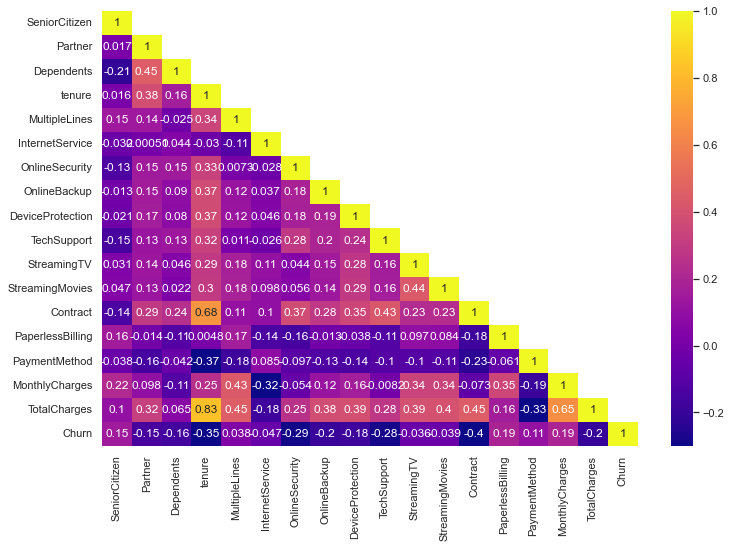

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,mask=np.triu(data.corr(),+1),cmap='plasma',vmin=-0.3,vmax=1)

In [41]:
# Copy all the predictor variables into X dataframe
X = data.drop('Churn', axis=1)

# Copy target into the y dataframe.  
y = data['Churn']

In [42]:
X

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,1,1,11,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regressor Model

In [44]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()   #Regressor
regression_model.fit(X_train, y_train)

LinearRegression()

In [45]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))


The coefficient for SeniorCitizen is 0.05586171247493674
The coefficient for Partner is -0.0029211127872625876
The coefficient for Dependents is -0.017719126679857564
The coefficient for tenure is -0.0014959332293742113
The coefficient for MultipleLines is 0.02506964327268302
The coefficient for InternetService is 0.015816256159949405
The coefficient for OnlineSecurity is -0.03959806744882426
The coefficient for OnlineBackup is -0.02020771782053909
The coefficient for DeviceProtection is -0.016935955239271265
The coefficient for TechSupport is -0.04152432679083554
The coefficient for StreamingTV is 0.00800210303369494
The coefficient for StreamingMovies is 0.013150199270148535
The coefficient for Contract is -0.05285939043888303
The coefficient for PaperlessBilling is 0.047851509686964055
The coefficient for PaymentMethod is 0.0037695788676251276
The coefficient for MonthlyCharges is 0.00500311753533653
The coefficient for TotalCharges is -5.452446648108038e-05


In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [47]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

### Logistic Regression model

In [48]:
# Fit the Logistic Regression model
logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logistic_model.fit(X_train, y_train)

C:\Softwares\Anaconda\envs\r env\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [49]:
ytrain_predict = logistic_model.predict(X_train)
ytest_predict = logistic_model.predict(X_test)

In [50]:
ytest_predict_prob=logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.997574,0.002426
1,0.266792,0.733208
2,0.916467,0.083533
3,0.343402,0.656598
4,0.534582,0.465418


In [51]:
#Train Data Accuracy
logistic_train_acc=logistic_model.score(X_train,y_train) 
logistic_train_acc

0.8026166097838453

In [52]:
#Test Data Accuracy
logistic_test_acc=logistic_model.score(X_test, y_test)
logistic_test_acc

0.8026166097838453

In [53]:
logistic_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_f1=round(df.loc["1"][2],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_precision=round(df.loc["1"][0],2)
print ('logistic_train_precision ',logistic_train_precision)
print ('logistic_train_recall ',logistic_train_recall)
print ('logistic_train_f1 ',logistic_train_f1)

logistic_train_precision  0.66
logistic_train_recall  0.54
logistic_train_f1  0.6


In [54]:
logistic_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_test_f1=round(df.loc["1"][2],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_precision=round(df.loc["1"][0],2)
print ('logistic_test_precision ',logistic_test_precision)
print ('logistic_test_recall ',logistic_test_recall)
print ('logistic_test_f1 ',logistic_test_f1)

logistic_test_precision  0.65
logistic_test_recall  0.53
logistic_test_f1  0.59


In [55]:
import scikitplot as scikit

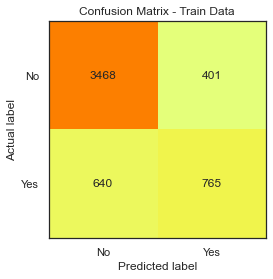

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
y_train_predict = logistic_model.predict(X_train)
cm = confusion_matrix(y_train, y_train_predict)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

# Add text annotations to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center')

plt.show()


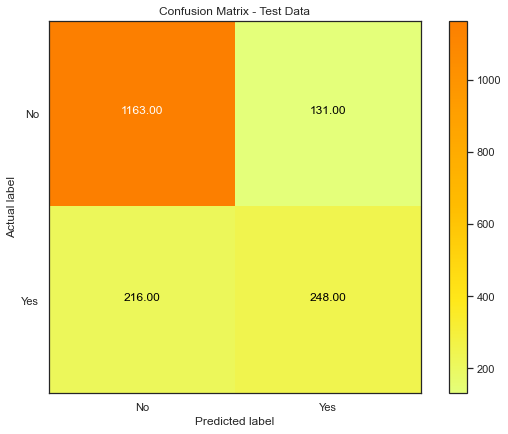

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '0.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_test_predict = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['No', 'Yes'], title='Confusion Matrix - Test Data')
plt.show()


In [58]:

from imblearn.over_sampling import SMOTE


In [59]:
sm = SMOTE(random_state=2)


In [60]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [61]:
## Let's check the shape after SMOTE
X_train_res.shape

(7738, 17)

In [62]:
logistic_model.fit(X_train_res, y_train_res)

C:\Softwares\Anaconda\envs\r env\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [63]:
ytrain_predict = logistic_model.predict(X_train_res)
ytest_predict = logistic_model.predict(X_test)

In [64]:
ytest_predict_prob=logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.999062,0.000938
1,0.229185,0.770815
2,0.627734,0.372266
3,0.142185,0.857815
4,0.267471,0.732529


In [65]:
#Train Data Accuracy
logistic_train_acc_res=logistic_model.score(X_train_res,y_train_res) 
logistic_train_acc_res

0.7947790126647712

In [66]:
#Test Data Accuracy
logistic_test_acc_res=logistic_model.score(X_test, y_test)
logistic_test_acc_res

0.7497155858930603

In [70]:
print(classification_report(y_train_res, ytrain_predict))
# Generate the classification report for the training data
logisticamote_metrics = classification_report(y_train_res, ytrain_predict, output_dict=True)

# Convert the metrics to a DataFrame
df = pd.DataFrame(logisticamote_metrics).transpose()

# Extract the precision, recall, and F1-score for the positive class (class "1")
logistic_sm_train_precision = round(df.loc["1"]["precision"], 2)
logistic_sm_train_recall = round(df.loc["1"]["recall"], 2)
logistic_sm_train_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('logistic_sm_train_precision:', logistic_sm_train_precision)
print('logistic_sm_train_recall:', logistic_sm_train_recall)
print('logistic_sm_train_f1:', logistic_sm_train_f1)

              precision    recall  f1-score   support

           0       0.83      0.75      0.78      3869
           1       0.77      0.84      0.80      3869

    accuracy                           0.79      7738
   macro avg       0.80      0.79      0.79      7738
weighted avg       0.80      0.79      0.79      7738

logistic_sm_train_precision: 0.77
logistic_sm_train_recall: 0.84
logistic_sm_train_f1: 0.8


In [72]:
print(classification_report(y_test, ytest_predict))
logisticamote_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df=pd.DataFrame(logisticamote_metrics).transpose()
logistic_sm_test_f1=round(df.loc["1"][2],2)
logistic_sm_test_recall=round(df.loc["1"][1],2)
logistic_sm_test_precision=round(df.loc["1"][0],2)
print ('logistic_sm_test_precision ',logistic_sm_test_precision)
print ('logistic_sm_test_recall ',logistic_sm_test_recall)
print ('logistic_sm_test_f1 ',logistic_sm_test_f1)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1294
           1       0.52      0.77      0.62       464

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.80      0.75      0.76      1758

logistic_sm_test_precision  0.52
logistic_sm_test_recall  0.77
logistic_sm_test_f1  0.62


### LDA Model

In [73]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)

In [74]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = lda_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = lda_model.predict(X_test)

In [75]:
ytest_predict_prob=lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.978066,0.021934
1,0.192921,0.807079
2,0.894388,0.105612
3,0.278726,0.721274
4,0.480101,0.519899


In [76]:
#Train Data Accuracy
lda_train_acc=lda_model.score(X_train,y_train) 
lda_train_acc

0.7961698900265454

In [77]:
lda_test_acc=lda_model.score(X_test, y_test)
lda_test_acc

0.7952218430034129

In [78]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3869
           1       0.64      0.53      0.58      1405

    accuracy                           0.80      5274
   macro avg       0.74      0.71      0.72      5274
weighted avg       0.79      0.80      0.79      5274



In [79]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1294
           1       0.63      0.54      0.58       464

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [80]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.64
lda_train_recall  0.53
lda_train_f1  0.58


In [81]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.63
lda_test_recall  0.54
lda_test_f1  0.58


In [82]:
X_train_res, y_train_res

(      SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
 0                 0        1           0      71              2   
 1                 0        0           1      49              0   
 2                 0        0           0      72              0   
 3                 0        0           0       4              0   
 4                 0        0           0       9              0   
 ...             ...      ...         ...     ...            ...   
 7733              0        0           0       1              2   
 7734              0        0           0       2              0   
 7735              0        0           0       7              0   
 7736              1        0           0      52              1   
 7737              0        0           0      13              0   
 
       InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
 0                   1               0             2                 2   
 1                   2            

In [83]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train_res, y_train_res)

In [84]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = lda_model.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = lda_model.predict(X_test)

In [85]:
ytest_predict_prob=lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.990082,0.009918
1,0.150722,0.849278
2,0.504844,0.495156
3,0.079720,0.920280
4,0.192512,0.807488


In [86]:
#Train Data Accuracy
lda_train_acc=lda_model.score(X_train_res,y_train_res) 
lda_train_acc

0.7876712328767124

In [87]:
lda_test_acc=lda_model.score(X_test, y_test)
lda_test_acc

0.7383390216154722

In [88]:
print(classification_report(y_train_res, ytrain_predict))
lda_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

              precision    recall  f1-score   support

           0       0.83      0.73      0.77      3869
           1       0.76      0.85      0.80      3869

    accuracy                           0.79      7738
   macro avg       0.79      0.79      0.79      7738
weighted avg       0.79      0.79      0.79      7738

lda_train_precision  0.76
lda_train_recall  0.85
lda_train_f1  0.8


In [89]:
print(classification_report(y_test, ytest_predict))
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1294
           1       0.50      0.78      0.61       464

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.75      1758

lda_test_precision  0.5
lda_test_recall  0.78
lda_test_f1  0.61


### Decision Tree

In [90]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTree.fit(X_train_res,y_train_res)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [91]:
decision_trscore = dTree.score(X_train_res,y_train_res)
decision_tsscore = dTree.score(X_test, y_test)
print(decision_trscore)
print(decision_tsscore)

0.7923235978288964
0.7434584755403868


In [92]:
train_char_label = ['No', 'Yes']
vote_Tree_File = open('vote_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=vote_Tree_File, feature_names = list(X_train_res), class_names = list(train_char_label))
vote_Tree_File.close()

In [93]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_res.columns))

                       Imp
SeniorCitizen     0.000234
Partner           0.028651
Dependents        0.000000
tenure            0.000000
MultipleLines     0.000000
InternetService   0.000000
OnlineSecurity    0.131148
OnlineBackup      0.003949
DeviceProtection  0.000000
TechSupport       0.059466
StreamingTV       0.000000
StreamingMovies   0.000000
Contract          0.691883
PaperlessBilling  0.000000
PaymentMethod     0.000000
MonthlyCharges    0.072693
TotalCharges      0.011977


In [94]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = dTree.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = dTree.predict(X_test)

In [95]:
print(classification_report(y_train_res, ytrain_predict))
decision_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(decision_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
decision_train_precision = round(df.loc["1"]["precision"], 2)
decision_train_recall = round(df.loc["1"]["recall"], 2)
decision_train_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('decision_train_precision:', decision_train_precision)
print('decision_train_recall:', decision_train_recall)
print('decision_train_f1:', decision_train_f1)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3869
           1       0.77      0.83      0.80      3869

    accuracy                           0.79      7738
   macro avg       0.79      0.79      0.79      7738
weighted avg       0.79      0.79      0.79      7738

decision_train_precision: 0.77
decision_train_recall: 0.83
decision_train_f1: 0.8


In [96]:
print(classification_report(y_test, ytest_predict))
decision_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(decision_metrics).transpose()
decision_test_precision = round(df.loc["1"]["precision"], 2)
decision_test_recall = round(df.loc["1"]["recall"], 2)
decision_test_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('decision_test_precision:', decision_test_precision)
print('decision_test_recall:', decision_test_recall)
print('decision_test_f1:', decision_test_f1)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1294
           1       0.51      0.73      0.60       464

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.71      1758
weighted avg       0.79      0.74      0.76      1758

decision_test_precision: 0.51
decision_test_recall: 0.73
decision_test_f1: 0.6


### Ensemble Learning - Bagging

In [97]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train_res,y_train_res)

C:\Softwares\Anaconda\envs\r env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [98]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = bgcl.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = bgcl.predict(X_test)

In [99]:
ytest_predict_prob=bgcl.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.992628,0.007372
1,0.209371,0.790629
2,0.895395,0.104605
3,0.177062,0.822938
4,0.181496,0.818504


In [100]:
bgcl_train_acc=bgcl.score(X_train_res,y_train_res) 
bgcl_train_acc

0.8073145515637116

In [101]:
bgcl_test_acc=bgcl.score(X_test, y_test)
bgcl_test_acc

0.757679180887372

In [102]:
print(classification_report(y_train_res, ytrain_predict))
bagging_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
bagging_train_precision = round(df.loc["1"]["precision"], 2)
bagging_train_recall = round(df.loc["1"]["recall"], 2)
bagging_train_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('bagging_train_precision:', bagging_train_precision)
print('bagging_train_recall:', bagging_train_recall)
print('bagging_train_f1:', bagging_train_f1)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      3869
           1       0.78      0.85      0.82      3869

    accuracy                           0.81      7738
   macro avg       0.81      0.81      0.81      7738
weighted avg       0.81      0.81      0.81      7738

bagging_train_precision: 0.78
bagging_train_recall: 0.85
bagging_train_f1: 0.82


In [103]:
print(classification_report(y_test, ytest_predict))
bagging_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
bagging_test_precision = round(df.loc["1"]["precision"], 2)
bagging_test_recall = round(df.loc["1"]["recall"], 2)
bagging_test_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('bagging_test_precision:', bagging_test_precision)
print('bagging_test_recall:', bagging_test_recall)
print('bagging_test_f1:', bagging_test_f1)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1294
           1       0.53      0.75      0.62       464

    accuracy                           0.76      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.76      0.77      1758

bagging_test_precision: 0.53
bagging_test_recall: 0.75
bagging_test_f1: 0.62


# ADA boost

In [104]:

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=42)
ADB_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [105]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train_res)
model_score_train = ADB_model.score(X_train_res, y_train_res)
print(model_score_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))
adaboost_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(adaboost_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
adaboost_train_precision = round(df.loc["1"]["precision"], 2)
adaboost_train_recall = round(df.loc["1"]["recall"], 2)
adaboost_train_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('adaboost_train_precision:', adaboost_train_precision)
print('adaboost_train_recall:', adaboost_train_recall)
print('adaboost_train_f1:', adaboost_train_f1)

0.8256655466528818
[[3011  858]
 [ 491 3378]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      3869
           1       0.80      0.87      0.83      3869

    accuracy                           0.83      7738
   macro avg       0.83      0.83      0.83      7738
weighted avg       0.83      0.83      0.83      7738

adaboost_train_precision: 0.78
adaboost_train_recall: 0.85
adaboost_train_f1: 0.82


In [106]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score_test = ADB_model.score(X_test, y_test)
print(model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
adaboost_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(adaboost_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
adaboost_test_precision = round(df.loc["1"]["precision"], 2)
adaboost_test_recall = round(df.loc["1"]["recall"], 2)
adaboost_test_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('adaboost_test_precision:', adaboost_test_precision)
print('adaboost_test_recall:', adaboost_test_recall)
print('adaboost_test_f1:', adaboost_test_f1)

0.7724687144482366
[[1011  283]
 [ 117  347]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1294
           1       0.55      0.75      0.63       464

    accuracy                           0.77      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.81      0.77      0.78      1758

adaboost_test_precision: 0.53
adaboost_test_recall: 0.75
adaboost_test_f1: 0.62


## Random Forest

In [107]:
param_grid = {
    'max_depth': [7,12],
    'max_features': [6, 9],
    'min_samples_leaf': [ 15,30,45],
    'min_samples_split': [30, 50,100,150,200],
    'n_estimators': [300, 500,100,700,1000]
}

rfr = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [108]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [7, 12], 'max_features': [6, 9],
                         'min_samples_leaf': [15, 30, 45],
                         'min_samples_split': [30, 50, 100, 150, 200],
                         'n_estimators': [300, 500, 100, 700, 1000]})

In [109]:
print(grid_search.best_params_)

{'max_depth': 12, 'max_features': 6, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 700}


In [110]:
grid_search.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [7, 12], 'max_features': [6, 9],
                         'min_samples_leaf': [15, 30, 45],
                         'min_samples_split': [30, 50, 100, 150, 200],
                         'n_estimators': [300, 500, 100, 700, 1000]})

In [111]:
print(grid_search.best_params_)

{'max_depth': 12, 'max_features': 6, 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 1000}


In [112]:
## Performance Matrix on train data set
y_train_predict = grid_search.predict(X_train_res)
rm_model_score_train =grid_search.score(X_train_res, y_train_res)
print(rm_model_score_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))
randomforest_metrics=classification_report(y_train_res, y_train_predict,output_dict=True)
df=pd.DataFrame(randomforest_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
randomforest_train_precision = round(df.loc["1"]["precision"], 2)
randomforest_train_recall = round(df.loc["1"]["recall"], 2)
randomforest_train_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('randomforest_train_precision:', randomforest_train_precision)
print('randomforest_train_recall:', randomforest_train_recall)
print('randomforest_train_f1:', randomforest_train_f1)

0.8584905660377359
[[3245  624]
 [ 471 3398]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3869
           1       0.84      0.88      0.86      3869

    accuracy                           0.86      7738
   macro avg       0.86      0.86      0.86      7738
weighted avg       0.86      0.86      0.86      7738

randomforest_train_precision: 0.84
randomforest_train_recall: 0.88
randomforest_train_f1: 0.86


In [113]:
## Performance Matrix on test data set
y_test_predict = grid_search.predict(X_test)
rm_model_score_test = grid_search.score(X_test, y_test)
print(rm_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
randomforest_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(randomforest_metrics).transpose()
# Extract the precision, recall, and F1-score for the positive class (class "1")
randomforest_test_precision = round(df.loc["1"]["precision"], 2)
randomforest_test_recall = round(df.loc["1"]["recall"], 2)
randomforest_test_f1 = round(df.loc["1"]["f1-score"], 2)

# Print the precision, recall, and F1-score
print('randomforest_test_precision:', randomforest_test_precision)
print('randomforest_test_recall:', randomforest_test_recall)
print('randomforest_test_f1:', randomforest_test_f1)

0.7844141069397043
[[1065  229]
 [ 150  314]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1294
           1       0.58      0.68      0.62       464

    accuracy                           0.78      1758
   macro avg       0.73      0.75      0.74      1758
weighted avg       0.80      0.78      0.79      1758

randomforest_test_precision: 0.53
randomforest_test_recall: 0.75
randomforest_test_f1: 0.62


In [115]:

index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Train':[logistic_train_acc_res, logistic_sm_train_precision, logistic_sm_train_recall, logistic_sm_train_f1],'Logistic Test':
[logistic_test_acc_res, logistic_sm_test_precision, logistic_sm_test_recall, logistic_sm_test_f1],
'LDA Train':[lda_train_acc,lda_train_precision, lda_train_recall, lda_train_f1],
'LDA Test':[lda_test_acc, lda_test_precision, lda_test_recall, lda_test_f1],
'Decision Train':[decision_trscore, decision_train_precision, decision_train_recall, decision_train_f1],
'Decision Test':[decision_tsscore, decision_test_precision, decision_test_recall, decision_test_f1],
'Bagging Train':[bgcl_train_acc, bagging_train_precision, bagging_train_recall, bagging_train_f1],
'Bagging Test':[bgcl_test_acc, bagging_test_precision, bagging_test_recall, bagging_test_f1],
'Ensemble Train':[model_score_train, adaboost_train_precision, adaboost_train_recall, adaboost_train_f1],
'Ensembel Test':[model_score_test, adaboost_test_precision, adaboost_test_recall, adaboost_test_f1],
'Random Forest Train':[rm_model_score_train, randomforest_train_precision, randomforest_train_recall, randomforest_train_f1],
'Random Forest Test':[rm_model_score_test, randomforest_test_precision, randomforest_test_recall, randomforest_test_f1] },index=index)
round(data,2)

,Logistic Train,Logistic Test,LDA Train,LDA Test,Decision Train,Decision Test,Bagging Train,Bagging Test,Ensemble Train,Ensembel Test,Random Forest Train,Random Forest Test
Accuracy,0.79,0.75,0.79,0.74,0.79,0.74,0.81,0.76,0.83,0.77,0.86,0.78
Recall,0.77,0.52,0.76,0.50,0.77,0.51,0.78,0.53,0.78,0.53,0.84,0.53
Precision,0.84,0.77,0.85,0.78,0.83,0.73,0.85,0.75,0.85,0.75,0.88,0.75
F1 Score,0.80,0.62,0.80,0.61,0.80,0.60,0.82,0.62,0.82,0.62,0.86,0.62
